# Project Title: 

Sepsis Classification Machine Learning Project with FastAPI Deployment

# Business Understanding

## 1. Introduction
This project focuses on the early detection and classification of sepsis, a life-threatening medical condition. Sepsis is a critical concern in healthcare, and early diagnosis can significantly improve patient outcomes. The objective is to build a robust machine learning model for sepsis classification and deploy it into a web application using FastAPI, making it accessible for real-time predictions.

### 1.1. Objectives
- Understand the Data: 
The primary objective of this project is to gain a comprehensive understanding of the patient data, which includes various health-related features, demographics, and the presence or absence of sepsis. This understanding will empower healthcare professionals and decision-makers to make informed decisions regarding patient care and intervention.

- Predict Sepsis: 
Develop an accurate machine learning classification model that can predict the likelihood of a patient developing sepsis based on the provided features. Early and accurate sepsis prediction is crucial for timely medical intervention and improving patient outcomes.

- Web Application Integration: 
Integrate the trained sepsis classification model into a web application using FAST API. This web application will serve as a practical tool for healthcare practitioners to input patient data and receive real-time sepsis risk predictions, aiding in clinical decision-making.

### 1.2. Methodology
To achieve the project objectives, we will follow a structured approach:

- Data Loading and Exploration: 
Begin by loading and exploring the patient data, including features like age, vital signs, and medical history. This step will provide initial insights into the dataset and identify any data quality issues.

- Data Preprocessing: 
Handle missing values, perform feature engineering, and encode categorical variables as needed. Preprocessing steps will ensure that the data is ready for training the machine learning model.

- Model Development: 
Select and implement a suitable machine learning classification model for sepsis prediction. This model will be trained on historical patient data to learn patterns indicative of sepsis.

- Model Evaluation: 
Assess the model's performance using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Rigorous evaluation will help identify the model's effectiveness in predicting sepsis cases.

- FAST API Integration: 
Integrate the trained machine learning model into a FAST API-based web application. This application will provide a user-friendly interface for healthcare professionals to input patient data and obtain sepsis risk predictions.

- Testing and Validation: 
Conduct thorough testing and validation of the web application to ensure its reliability and accuracy in real-time sepsis risk assessment.

- Documentation: 
Provide detailed documentation on how to use the web application, including input requirements and interpretation of results.

By following this methodology, we aim to provide healthcare professionals with a valuable tool for early sepsis detection and decision support, ultimately contributing to improved patient care and outcomes.

# Setup

## Installations

## Importation of Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Loading

### Loading the Train and Test Datasets

#### Train Dataset

In [2]:
# Load The Train Dataset
train_df = pd.read_csv("data/Paitients_Files_Train.csv")
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


#### Test Dataset

In [3]:
# Load The Test Dataset
test_df = pd.read_csv("data/Paitients_Files_Test.csv")
test_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


Columns Description (Common to Both Datasets):

- ID: A unique identifier for each patient.
- PRG: Number of pregnancies (applicable only to females).
- PL: Plasma glucose concentration.
- PR: Diastolic blood pressure.
- SK: Triceps skinfold thickness.
- TS: 2-hour serum insulin.
- M11: Body mass index (BMI).
- BD2: Diabetes pedigree function.
- Age: Age of the patient.
- Insurance: Whether the patient has insurance coverage (1 for Yes, 0 for No).
Sepsis (Only in Test Dataset): The target variable indicating the presence or absence of sepsis (Positive for presence, Negative for absence).

Both datasets contain patient-related information, with the test dataset having an additional "Sepsis" column for target classification. The  dataset is designed for model training, while the test dataset will be used for model evaluation.

## Hypothesis

Null Hypothesis (H0): There is no significant association between the patient's age and the likelihood of sepsis.

Alternative Hypothesis (H1): There is a significant association between the patient's age and the likelihood of sepsis.

## Key Analytical Questions

i. What is the distribution of sepsis cases (Positive and Negative) in the Train dataset, and how does it affect the analysis?

ii. Are there any correlations or patterns between the numerical features (e.g., PRG, PL, PR, SK, TS, M11, BD2, Age) and the presence of sepsis (Positive/Negative)?

iii. How does the distribution of key numerical variables (e.g., PR, SK, TS, M11) differ between patients with and without sepsis?

iv. Is there a relationship between the number of pregnancies (PRG) and plasma glucose concentration (PL)? Does this relationship vary with the presence of sepsis?

v. Are there any significant differences in diastolic blood pressure (PR) between patients with different triceps skinfold thickness (SK) levels?

vi. Does the body mass index (M11) vary significantly with 2-hour serum insulin (TS) levels?

vii. Is there a correlation between the diabetes pedigree function (BD2) and age? How does this correlation affect the likelihood of sepsis?

viii. Are patients with insurance coverage more likely to have certain health characteristics (e.g., higher age, higher BMI) compared to those without insurance coverage?

ix. Do certain combinations of numerical variables provide better predictive power for sepsis classification using machine learning models?

x. How can the insights gained from this bivariate analysis inform feature selection and engineering for the sepsis classification model?

# Exploratory Data Analysis (EDA)

## Understanding the datasets

An in-depth exploration of the datasets is presented to gain insights into the available variables,their distributions and relationships. This step will provide an initial undertanding of the datasets to identify any data quality issues that will inform the cleaning and pre-processing.

### i. Column Information of The Datasets

In [4]:
# Column information of the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


- There are a total of 599 entries (rows) and 11 columns, each with a specific data type.
- The 'ID' column serves as a unique identifier for each patient. 
- The 'Sepssis' column contains categorical data (object) and represents the target variable indicating the presence or absence of sepsis.
- The remaining columns (PRG, PL, PR, SK, TS, M11, BD2, Age, and Insurance) contain numerical data.

In [5]:
# Column information of the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


- There are a total of 169 entries (rows) and 10 columns, each with a specific data type.
- Similar to the Train dataset, the 'ID' column serves as a unique identifier for each patient.
- Unlike the Train dataset, the Test dataset does not include the 'Sepssis' column, as it is intended for evaluating sepsis predictions and doesn't contain the target variable.

### ii. Shape of The Datasets

In [6]:
# The shape of the train dataset
train_df.shape

(599, 11)

In [7]:
# The shape of the train dataset
test_df.shape

(169, 10)

### iii. Summary Statistics Datasets

In [8]:
# Summary Statistics of The Train Dataset
train_df.describe().round(3)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000
mean,3.825,120.154,68.733,20.563,79.461,31.920,0.481,33.290,0.686
std,3.363,32.682,19.336,16.018,116.576,8.008,0.338,11.828,0.464
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,64.000,0.000,0.000,27.100,0.248,24.000,0.000
50%,3.000,116.000,70.000,23.000,36.000,32.000,0.383,29.000,1.000
75%,6.000,140.000,80.000,32.000,123.500,36.550,0.647,40.000,1.000
max,17.000,198.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [9]:
# Summary Statistics of The Test
test_df.describe().round(3)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000,169.000,169.000,169.000,169.000,169.000,169.000,169.000,169.000
mean,3.917,123.521,70.426,20.444,81.000,32.250,0.439,33.065,0.728
std,3.402,29.259,19.427,15.765,110.721,7.445,0.307,11.548,0.446
min,0.000,56.000,0.000,0.000,0.000,0.000,0.100,21.000,0.000
25%,1.000,102.000,62.000,0.000,0.000,27.600,0.223,24.000,0.000
50%,3.000,120.000,74.000,23.000,0.000,32.400,0.343,28.000,1.000
75%,6.000,141.000,80.000,32.000,135.000,36.600,0.587,42.000,1.000
max,13.000,199.000,114.000,49.000,540.000,57.300,1.698,70.000,1.000


i. PRG (Number of Pregnancies):
- The average number of pregnancies is approximately 3.92, suggesting that, on average, patients have had several pregnancies.
- The range of values varies from 0 (no pregnancies) to a maximum of 13 pregnancies.
- Similar to the Train dataset, the majority of patients fall within the range of 1 to 6 pregnancies.

ii. PL (Plasma Glucose Concentration):
- The mean plasma glucose concentration is around 123.52 mg/dL.
- The values range from a minimum of 56 mg/dL to a maximum of 199 mg/dL.
- Similar to the Train dataset, the standard deviation of 29.26 indicates some variability in glucose levels among patients.

iii. PR (Diastolic Blood Pressure):
- The mean diastolic blood pressure is approximately 70.43 mm Hg.
- The values range from a minimum of 0 mm Hg (which seems unusual) to a maximum of 114 mm Hg.
- Most patients have diastolic blood pressure levels within the range of 62 to 80 mm Hg.

iv. SK (Triceps Skinfold Thickness):
- The mean triceps skinfold thickness is around 20.44 mm.
- The values range from a minimum of 0 mm (which might indicate missing data) to a maximum of 49 mm.
- As in the Train dataset, there is notable variability in skinfold thickness among patients.

v. TS (2-Hour Serum Insulin):
- The mean 2-hour serum insulin level is approximately 81.00 μU/ml.
- The values have a wide range, with a minimum of 0 μU/ml and a maximum of 540 μU/ml.
- As in the Train dataset, there is significant variability in insulin levels among patients.

vi. M11 (Body Mass Index - BMI):
- The mean BMI is approximately 32.25, indicating that, on average, patients have a BMI in the overweight range.
- BMI values vary widely, with a minimum of 0.100 (unusually low) and a maximum of 57.30.
- The standard deviation of 7.45 suggests substantial variability in BMI among patients.

vii. BD2 (Diabetes Pedigree Function):
- The mean diabetes pedigree function value is 0.439, reflecting the diabetes history in family members.
- Values range from a minimum of 0.100 to a maximum of 1.698.
- Similar to the Train dataset, the spread in diabetes pedigree function values indicates varying family histories of diabetes.

viii. Age:
- The average age of patients is approximately 33.07 years, which is similar to the Train dataset.
- Ages range from a minimum of 21 years to a maximum of 70 years.
- Most patients fall within the range of 24 to 42 years.

ix. Insurance:
- About 72.8% of the patients have insurance coverage, based on the mean value, which is slightly higher than in the Train dataset.

### iv. Checking for Missing Values in The Datasets

In [10]:
# Check for missing values in the datasets
datasets = {'train': train_df, 'test': test_df}

def show_missing_values(datasets):
    for name, data in datasets.items():
        print(f"Missing values in the {name.capitalize()} dataset:")
        print(data.isnull().sum())
        print('===' * 18)
        print()

show_missing_values(datasets)

Missing values in the Train dataset:
ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

Missing values in the Test dataset:
ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64



Both datasets do not have any missing values

### v. Checking for Duplicates in The Datasets

In [11]:
# Check for duplicates in the Train dataset
train_duplicates = train_df[train_df.duplicated()]

# Check for duplicates in the Test dataset
test_duplicates = test_df[test_df.duplicated()]

# Display the duplicate rows in the Train dataset, if any
if not train_duplicates.empty:
    print("Duplicate Rows in Train Dataset:")
    print(train_duplicates)
else:
    print("No Duplicate Rows in Train Dataset")

# Display the duplicate rows in the Test dataset, if any
if not test_duplicates.empty:
    print("\nDuplicate Rows in Test Dataset:")
    print(test_duplicates)
else:
    print("No Duplicate Rows in Test Dataset")

No Duplicate Rows in Train Dataset
No Duplicate Rows in Test Dataset


# Univariate Analysis

## i. Univariate Analysis for 'PRG' (Number of Pregnancies)

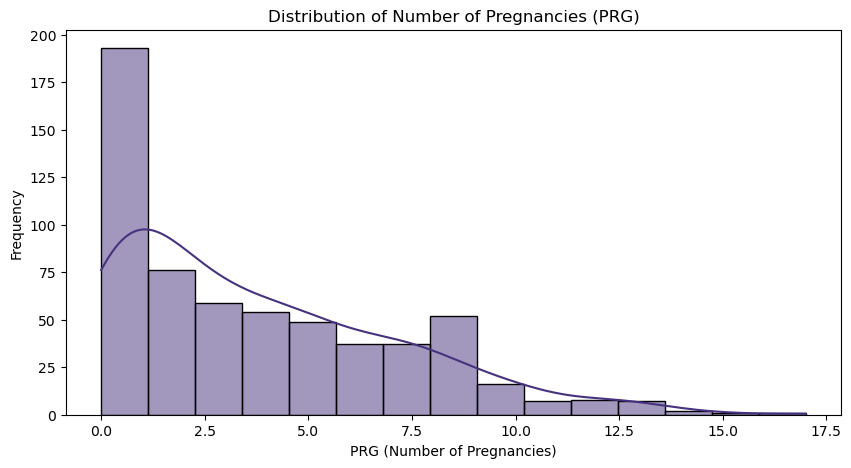

Summary Statistics for Number of Pregnancies (PRG):
count    599.000000
mean       3.824708
std        3.362839
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: PRG, dtype: float64


In [12]:
# Extract the 'PRG' column
prg_values = train_df['PRG']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(prg_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Number of Pregnancies (PRG)')
plt.xlabel('PRG (Number of Pregnancies)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Number of Pregnancies (PRG):')
print(prg_values.describe())

- The average number of pregnancies is approximately 3.83, suggesting that, on average, patients have had several pregnancies.
- The range of values varies from 0 (no pregnancies) to a maximum of 17 pregnancies.
- The majority of patients fall within the range of 1 to 6 pregnancies.

## ii. Univariate Analysis for 'PL' (Plasma Glucose Concentration)

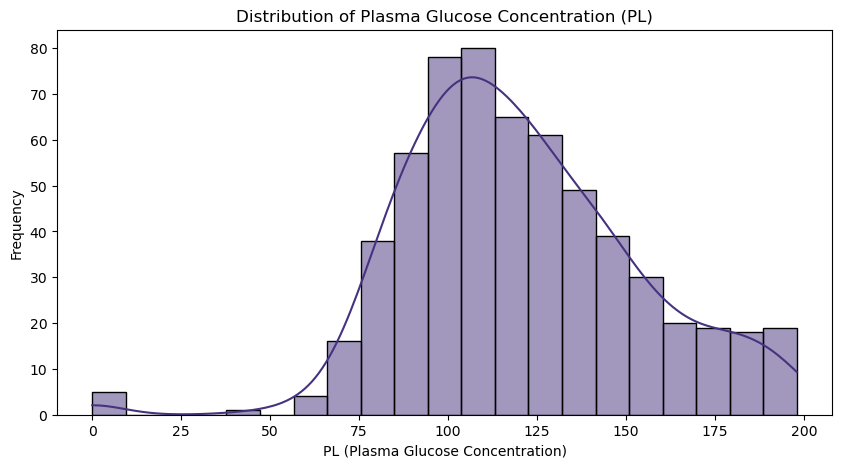

Summary Statistics for Plasma Glucose Concentration (PL):
count    599.000000
mean     120.153589
std       32.682364
min        0.000000
25%       99.000000
50%      116.000000
75%      140.000000
max      198.000000
Name: PL, dtype: float64


In [13]:
# Extract the 'PL' column
pl_values = train_df['PL']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(pl_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Plasma Glucose Concentration (PL)')
plt.xlabel('PL (Plasma Glucose Concentration)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Plasma Glucose Concentration (PL):')
print(pl_values.describe())

- The mean plasma glucose concentration is around 120.15 mg/dL.
- The values range from a minimum of 0 mg/dL (which seems unusual) to a maximum of 198 mg/dL.
- The standard deviation of 32.68 indicates some variability in glucose levels among patients.

## iii. Univariate Analysis for 'PR' (Diastolic Blood Pressure)

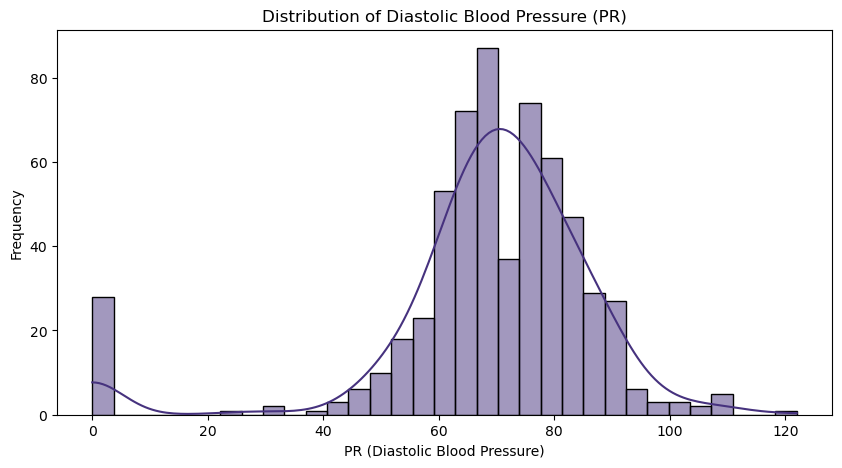

Summary Statistics for Diastolic Blood Pressure (PR):
count    599.000000
mean      68.732888
std       19.335675
min        0.000000
25%       64.000000
50%       70.000000
75%       80.000000
max      122.000000
Name: PR, dtype: float64


In [14]:
# Extract the 'PR' column
pr_values = train_df['PR']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(pr_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Diastolic Blood Pressure (PR)')
plt.xlabel('PR (Diastolic Blood Pressure)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Diastolic Blood Pressure (PR):')
print(pr_values.describe())

- The mean diastolic blood pressure is approximately 68.73 mm Hg.
- The values range from a minimum of 0 mm Hg (which seems unusual) to a maximum of 122 mm Hg.
- Most patients have diastolic blood pressure levels within the range of 64 to 80 mm Hg.

## iv. Univariate Analysis for 'SK' (Triceps Skinfold Thickness)

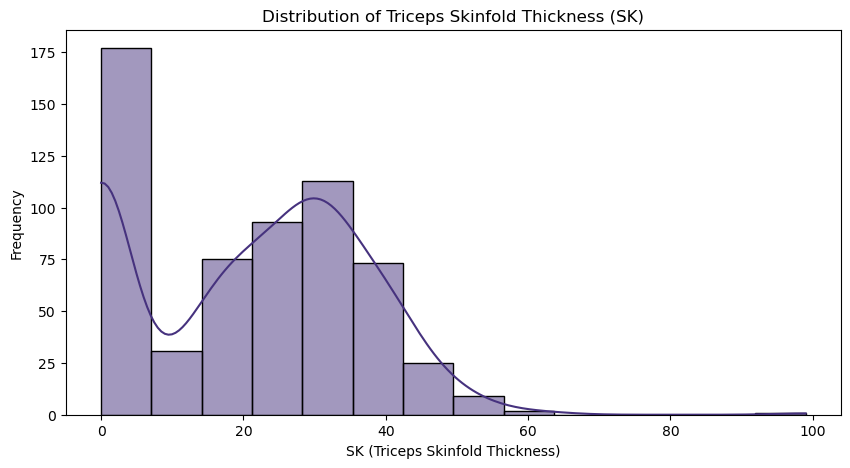

Summary Statistics for Triceps Skinfold Thickness (SK):
count    599.000000
mean      20.562604
std       16.017622
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SK, dtype: float64


In [15]:
# Extract the 'SK' column
sk_values = train_df['SK']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(sk_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Triceps Skinfold Thickness (SK)')
plt.xlabel('SK (Triceps Skinfold Thickness)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Triceps Skinfold Thickness (SK):')
print(sk_values.describe())

- The mean triceps skinfold thickness is around 20.56 mm.
- There is a notable spread in skinfold thickness among patients.

## v. Univariate Analysis for 'TS' (2-Hour Serum Insulin)

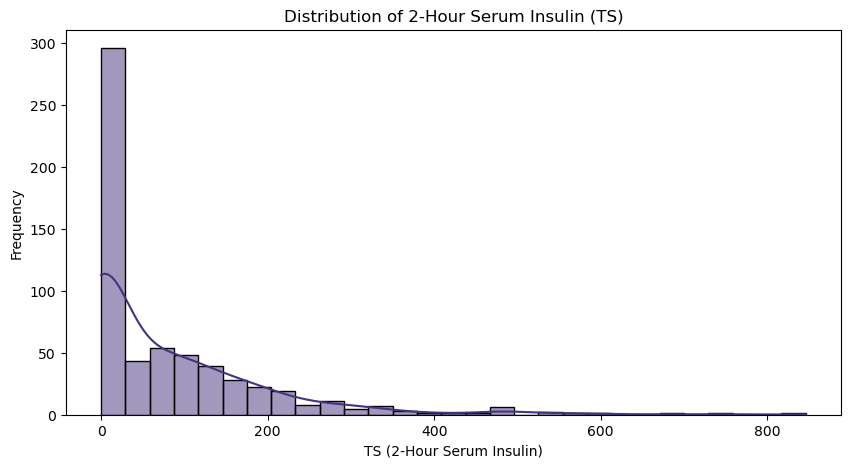

Summary Statistics for 2-Hour Serum Insulin (TS):
count    599.000000
mean      79.460768
std      116.576176
min        0.000000
25%        0.000000
50%       36.000000
75%      123.500000
max      846.000000
Name: TS, dtype: float64


In [16]:
# Extract the 'TS' column
ts_values = train_df['TS']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(ts_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of 2-Hour Serum Insulin (TS)')
plt.xlabel('TS (2-Hour Serum Insulin)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for 2-Hour Serum Insulin (TS):')
print(ts_values.describe())

- The mean 2-hour serum insulin level is approximately 79.46 μU/ml.
- The values have a wide range, with a minimum of 0 μU/ml and a maximum of 846 μU/ml.
- The standard deviation of 116.58 suggests significant variability in insulin levels.

## vi. Univariate Analysis for 'M11' (Body Mass Index - BMI)

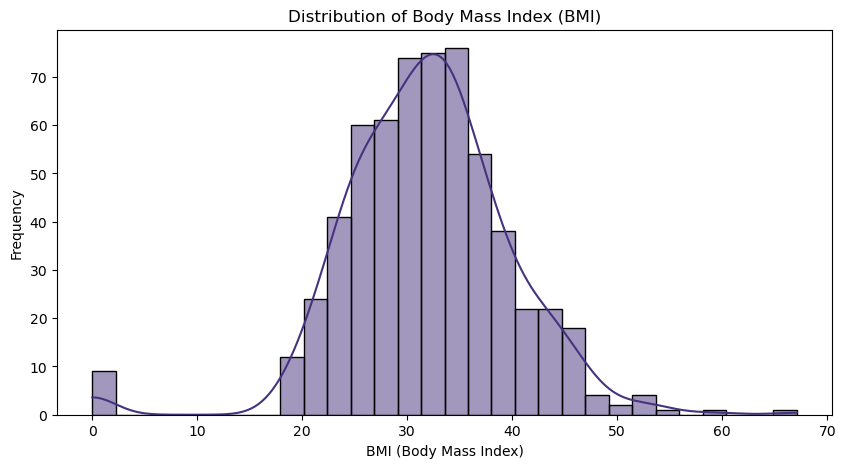

Summary Statistics for Body Mass Index (BMI):
count    599.000000
mean      31.920033
std        8.008227
min        0.000000
25%       27.100000
50%       32.000000
75%       36.550000
max       67.100000
Name: M11, dtype: float64


In [17]:
# Extract the 'M11' column
m11_values = train_df['M11']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(m11_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Body Mass Index (BMI)')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Body Mass Index (BMI):')
print(m11_values.describe())

- The mean BMI is approximately 31.92, indicating that, on average, patients have a BMI in the overweight range.
- BMI values vary widely, with a minimum of 0.078 (unusually low) and a maximum of 67.1.
- The standard deviation of 8.01 suggests substantial variability in BMI among patients.

## vii. BD2 (Diabetes Pedigree Function)

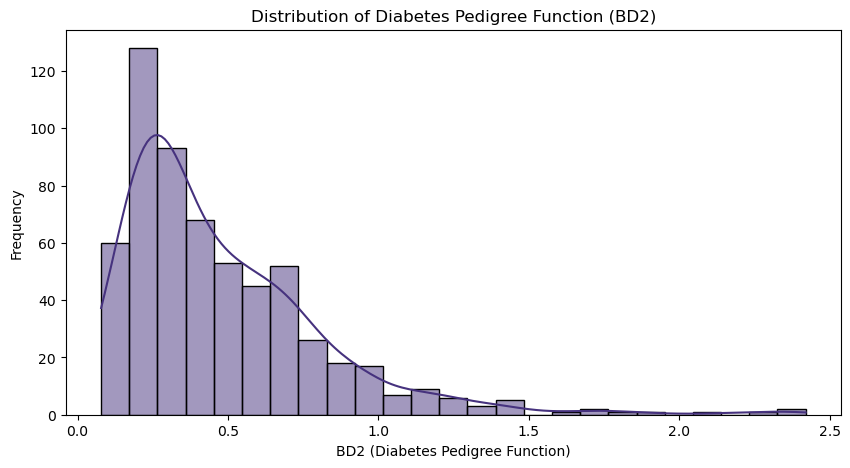

Summary Statistics for Diabetes Pedigree Function (BD2):
count    599.000000
mean       0.481187
std        0.337552
min        0.078000
25%        0.248000
50%        0.383000
75%        0.647000
max        2.420000
Name: BD2, dtype: float64


In [18]:
# Extract the 'BD2' column
bd2_values = train_df['BD2']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(bd2_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Diabetes Pedigree Function (BD2)')
plt.xlabel('BD2 (Diabetes Pedigree Function)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Diabetes Pedigree Function (BD2):')
print(bd2_values.describe())

- The mean diabetes pedigree function value is 0.481, which reflects the diabetes history in family members.
- Values range from a minimum of 0.078 to a maximum of 2.42.
- The spread in diabetes pedigree function values indicates varying family histories of diabetes.

## viii. Univariate Analysis for 'Age'

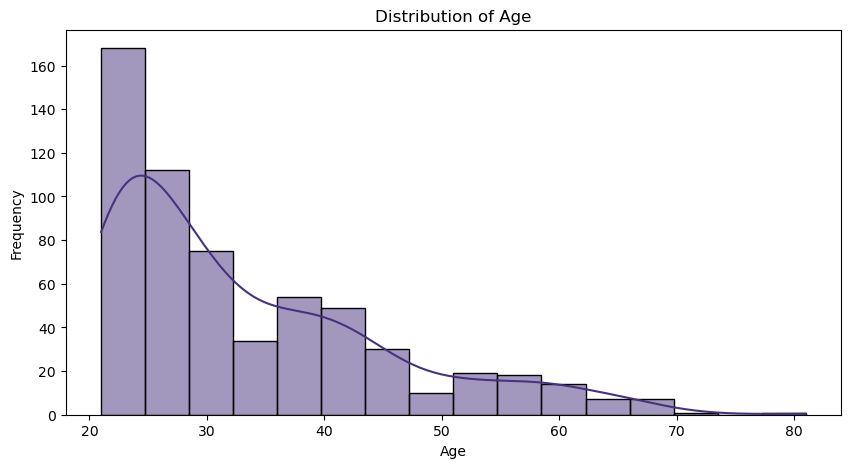

Summary Statistics for Age:
count    599.000000
mean      33.290484
std       11.828446
min       21.000000
25%       24.000000
50%       29.000000
75%       40.000000
max       81.000000
Name: Age, dtype: float64


In [19]:
# Extract the 'Age' column
age_values = train_df['Age']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(age_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Age:')
print(age_values.describe())

- The average age of patients is approximately 33.29 years.
- Ages range from a minimum of 21 years to a maximum of 81 years.
- Most patients fall within the range of 24 to 40 years.

## ix.Univariate Analysis for 'Insurance'

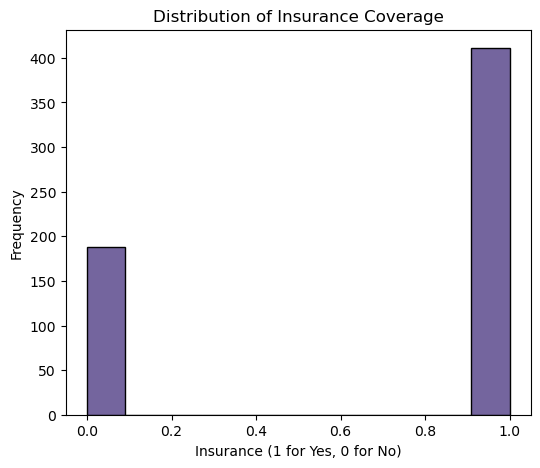

Summary Statistics for Insurance Coverage:
count    599.000000
mean       0.686144
std        0.464447
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Insurance, dtype: float64


In [20]:
# Extract the 'Insurance' column
insurance_values = train_df['Insurance']

# Plot a histogram
plt.figure(figsize=(6, 5))
sns.histplot(insurance_values, kde=False, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Insurance Coverage')
plt.xlabel('Insurance (1 for Yes, 0 for No)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Insurance Coverage:')
print(insurance_values.describe())

- About 68.6% of the patients have insurance coverage, based on the mean value.

## x.Univariate Analysis for 'Sepsis'

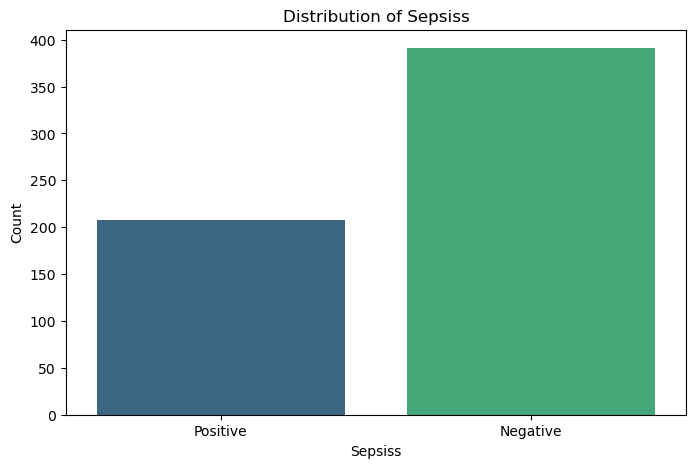

Insights for the Distribution of Sepsiss:
- There are 208 patients with sepsis (Positive) and 391 patients without sepsis (Negative).
- The distribution shows an imbalance, with more patients without sepsis.


In [21]:
# Plot the distribution of Sepsiss
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='Sepssis', palette='viridis')
plt.title('Distribution of Sepsiss')
plt.xlabel('Sepsiss')
plt.ylabel('Count')
plt.show()


# Insights
sepsis_counts = train_df['Sepssis'].value_counts()
print("Insights for the Distribution of Sepsiss:")
print(f"- There are {sepsis_counts['Positive']} patients with sepsis (Positive) and {sepsis_counts['Negative']} patients without sepsis (Negative).")
print("- The distribution shows an imbalance, with more patients without sepsis.")

# Bivariate Analysis

- The bivariate analysis will focus on investigating the relationship between age and the various health-related variables. 


- Analyzing the relationship between age and other relevant variables in relation to sepsis is essential because understanding how age interacts with these variables can provide valuable insights into the risk factors, progression, and management of sepsis across different age groups. 


- Sepsis is a complex medical condition influenced by various factors, and age is a fundamental demographic variable that can significantly impact the likelihood of its occurrence and its outcomes. 


- Examining age-specific patterns and associations with variables such as blood pressure, plasma glucose concentration, and other health indicators can identify age-related trends, assess the vulnerability of different age groups to sepsis, and tailor medical interventions and preventive strategies accordingly. 


- This analysis helps us develop a more comprehensive understanding of sepsis and the age-specific dynamics of the disease.


- To achieve this, we need to group patients into distinct age groups so that we can explore how specific age groups might be associated with different medical complications or characteristics relevant to sepsis.

In [36]:
# Creating the Age Group Column
# Define age intervals
age_intervals = [20, 40, 60, 80, 90]
age_labels = ['20-39', '40-59', '60-79', '80-90']

# Create labels for age intervals
train_df['Age Group'] = pd.cut(train_df['Age'], bins=age_intervals, labels=age_labels)

# Add a new column 'Age Group' based on age intervals
train_df['Age Group'] = pd.cut(train_df['Age'], bins=age_intervals, labels=age_labels)
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,Age Group
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,40-59
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,20-39
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,20-39
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,20-39
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive,20-39


- The generated age groups span from 20 to 90 years, ensuring that patients within each group share more or less the same medical complications or attributes that might be relevant to sepsis. 


- This categorization allows for a more focused and targeted analysis of how age impacts various health-related variables, providing insights into sepsis assessment and management across different age ranges.

## i. Bivariate Analysis between Age and Number of Pregnancies (PRG)

- Analyzing the relationship between age and the number of pregnancies in the context of sepsis is crucial for understanding potential health implications, especially for women. The number of pregnancies (parity) can significantly impact a woman's health and may influence her susceptibility to various medical conditions, including sepsis.


- Investigating how the number of pregnancies relates to age is essential to determine whether women with higher parity become more susceptible to sepsis as they age. This analysis can shed light on whether specific age groups of women might require more attention and care in terms of sepsis risk assessment and prevention.


- Sepsis is a medical emergency that can affect individuals of all ages, making it important to explore how age might influence its occurrence. By examining age-specific trends in the number of pregnancies, we can identify potential age groups that may be at higher risk of sepsis due to their reproductive history.

In [39]:
# Calculate the average number of pregnancies ('PRG') per age group and round to the nearest whole number
average_pregnancies_by_age = train_df.groupby('Age Group')['PRG'].mean().round().reset_index()

# Rename the columns for clarity
average_pregnancies_by_age.columns = ['Age Group', 'Average Pregnancies']

# Display the DataFrame
average_pregnancies_by_age

,Age Group,Average Pregnancies
0,20-39,3.0
1,40-59,7.0
2,60-79,4.0
3,80-90,9.0


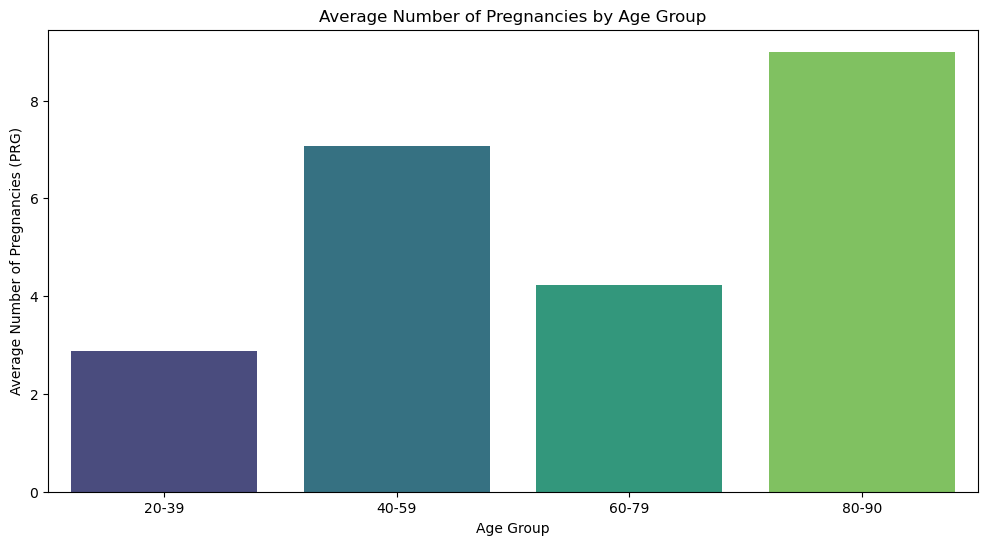

In [40]:
# Create a bar plot to visualize the average number of pregnancies ('PRG') by age group
plt.figure(figsize=(12, 6))
sns.barplot(data=train_df, x='Age Group', y='PRG', palette='viridis', ci=None)
plt.title('Average Number of Pregnancies by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Pregnancies (PRG)')
plt.xticks(rotation=0)
plt.show()

The analysis of age against the average number of pregnancies reveals distinct patterns across different age groups.

- Women in the 20-39 age group have an average of 3 pregnancies, while those in the 40-59 age group have a significantly higher average of 7 pregnancies.


- In the 60-79 age group, the average number of pregnancies decreases to 4, likely due to the onset of menopause in many women.


- The 80-90 age group shows the highest average of 9 pregnancies, reflecting the childbearing practices of earlier generations.


The relationship between age and the average number of pregnancies in the context of sepsis analysis highlights the impact of generational and life stage factors. While younger women tend to have fewer pregnancies, the older age groups show variations influenced by historical trends and the onset of menopause. Understanding these age-related patterns is essential for sepsis assessment, as it underscores the importance of considering demographic and life stage variables when studying the disease.


Older women may have specific healthcare needs related to their reproductive history, which could impact their susceptibility to sepsis.

## ii. Bivariate Analysis between 'Age' and 'PL' (Age vs. Plasma Glucose Concentration)

Plasma Glucose Concentration (PL) and age are critical factors in the context of sepsis. Elevated PL levels, often due to diabetes or stress-induced hyperglycemia, can weaken the immune system, increasing sepsis risk. Sepsis can affect all age groups, but its presentation varies with age. Understanding these factors is crucial for sepsis detection and management.

In [24]:
# Calculate the mean 'PL' for each age group
age_vs_pl_mean = train_df.groupby('Age Group')['PL'].mean().reset_index()

# Rename the columns for clarity
age_vs_pl_mean.columns = ['Age Group', 'Mean PL']

# Display the DataFrame
age_vs_pl_mean

,Age Group,Mean PL
0,20-39,116.669623
1,40-59,129.563492
2,60-79,137.857143
3,80-90,134.000000


In [45]:
# Calculate the mean 'PL' for each age group
age_vs_pl_mean = train_df.groupby('Age Group')['PL'].mean().reset_index()

# Create an interactive line plot
fig = px.line(age_vs_pl_mean, x='Age Group', y='PL', title='Mean Plasma Glucose Concentration (PL) by Age Group')
fig.update_xaxes(title='Age Group', tickangle=0)
fig.update_yaxes(title='Mean Plasma Glucose Concentration (PL)')

# Center the title
fig.update_layout(title_x=0.5)

# Make data points distinct with a marker
fig.update_traces(mode='markers+lines', marker=dict(size=8, line=dict(width=2, color='black')))

# Show the Plot
fig.show()

- In the age group of 20-40, the mean plasma glucose concentration is approximately 116.67. This group represents younger individuals, and their mean PL falls within the expected range for their age.


- As individuals age into the 40-60 group, the mean PL increases to approximately 129.56. This uptrend suggests that plasma glucose concentration tends to rise with age within this age bracket.


- Moving into the 60-80 age group, the mean PL further increases to about 137.86. This observation signifies a notable elevation in plasma glucose concentration among individuals in this age range, which may be associated with age-related factors or underlying health conditions.


- Lastly, in the 80-90 age group, the mean PL remains relatively stable at 134. This age group, representing the elderly, maintains a moderately high plasma glucose concentration.


- These insights highlight the relationship between age and plasma glucose concentration, indicating a progressive increase in plasma glucose concentration ('PL') with advancing age, particularly from middle age to old age.

Older age groups may be at higher risk of sepsis due to elevated PL levels, emphasizing the importance of monitoring and managing blood glucose in sepsis prevention.

## iii. Bivariate Analysis between 'Age' and 'PR' (Age vs. Diastolic Blood Pressure)

The relationship between 'Age' and 'PR' (Diastolic Blood Pressure) is essential to understand their potential impact on sepsis. Diastolic blood pressure ('PR') is a crucial cardiovascular parameter that varies with age and can be indicative of overall cardiovascular health. Age, on the other hand, is a significant factor in sepsis risk, as sepsis can affect individuals across different age groups, but its presentation and severity may vary.

To visualize this relationship more clearly, we'll group patients into age intervals and examine the mean diastolic blood pressure within each group.

In [26]:
# Calculate the mean 'PR' for each age group
age_vs_pr_mean = train_df.groupby('Age Group')['PR'].mean().reset_index()

# Rename the columns for clarity
age_vs_pr_mean.columns = ['Age Group', 'Mean PR']

# Display the DataFrame
age_vs_pr_mean

,Age Group,Mean PR
0,20-39,66.567627
1,40-59,75.690476
2,60-79,73.238095
3,80-90,74.000000


In [44]:
# Calculate the mean 'PR' for each age group
age_vs_pr_mean = train_df.groupby('Age Group')['PR'].mean().reset_index()

# Create an interactive bar plot
fig = px.bar(age_vs_pr_mean, x='Age Group', y='PR', title='Mean Diastolic Blood Pressure (PR) by Age Group')
fig.update_xaxes(title='Age Group')
fig.update_yaxes(title='Mean Diastolic Blood Pressure(PR)')

# Center the title
fig.update_layout(title_x=0.5)

# Show the Bar Plot
fig.show()

The analysis of diastolic blood pressure ('PR') across different age groups reveals distinct trends.
- In the 20-39 age group, the mean diastolic blood pressure is approximately 66.57 mm Hg.
- The 40-59 age group shows a higher mean PR of about 75.69 mm Hg.
- The 60-79 age group exhibits a mean PR of 73.24 mm Hg.
- The 80-90 age group has a mean PR of 74.00 mm Hg.

The relationship observed between age and diastolic blood pressure ('PR') suggests that there is a correlation between these two variables. As age increases, there is a tendency for diastolic blood pressure levels to also increase, with the 40-59 age group showing the highest mean PR.


Higher diastolic blood pressure in middle-aged individuals may contribute to an increased risk of sepsis, highlighting the need for cardiovascular health assessments in sepsis prevention.

## iv. Bivariate Analysis between 'Age' and 'M11' (Age vs. BMI)

- The analysis of the relationship between age and Body Mass Index (BMI) is important in the context of sepsis as both factors can influence a patient's susceptibility to sepsis and its management.


- BMI, a measure of body weight relative to height, can provide insights into a patient's overall health and nutritional status.


- Age, on the other hand, can impact how the body responds to infections and inflammation, which are central to sepsis.


- By examining how BMI changes with age, we can better understand how age-related changes in metabolism and body composition may affect the risk and outcomes of sepsis. 


- This analysis will help identify age groups that may be more vulnerable to sepsis due to their BMI levels and guide healthcare professionals in tailoring interventions and care strategies accordingly.

In [51]:
# Calculate the mean 'PR' for each age group
age_vs_bmi_mean = train_df.groupby('Age Group')['M11'].mean().reset_index()

# Rename the columns for clarity
age_vs_bmi_mean.columns = ['Age Group', 'Mean M11']

# Display the DataFrame
age_vs_bmi_mean

,Age Group,Mean M11
0,20-39,31.690244
1,40-59,33.312698
2,60-79,28.785714
3,80-90,25.900000


In [57]:
# Calculate the mean 'BMI' for each age group
age_vs_bmi_mean = train_df.groupby('Age Group')['M11'].mean().reset_index()

# Create an interactive bar plot to visualize the relationship between 'Age Group' and mean 'BMI'
fig = px.bar(age_vs_bmi_mean, x='Age Group', y='M11', title='Mean BMI by Age Group', labels={'M11': 'Mean BMI', 'Age Group': 'Age Group'})

fig.update_layout(
    yaxis=dict(title='Mean BMI'),
    title_x=0.5
)
# Show The Plot
fig.show()


- Individuals in the 40-59 age group exhibit the highest mean BMI (33.31), indicating a higher prevalence of overweight or obesity in this age range.


- In contrast, those aged 80-90 have the lowest mean BMI (25.90), suggesting a trend toward lower body weight in this older age group.

- The 20-39 age group shows a moderately high mean BMI (31.69), indicating a considerable proportion of individuals with higher body weight.


- Interestingly, the 60-79 age group falls in between, with a mean BMI of 28.79.


The relationship between age and BMI highlights that BMI tends to increase from younger to middle-aged adults, peaking in the 40-59 age group, and then gradually decreasing in the older age categories. This pattern may reflect lifestyle changes, metabolic shifts, or medical conditions associated with aging.

With regards to Sepsis, middle-aged individuals may have specific risks related to their BMI, while older age groups may have different risk factors to consider in sepsis management.

## v. Bivariate Analysis between 'Age' and 'BD2' (Age vs. Diabetes Pedigree Function)

Understanding how age interacts with BD2, a measure associated with the genetic predisposition to diabetes, is valuable for gaining insights into the risk factors and potential connections between age and diabetes-related health conditions, which can influence the likelihood and severity of sepsis. Analyzing this relationship allows us to assess whether BD2 levels vary significantly across different age groups, providing a better understanding of how age-related factors might contribute to the susceptibility or management of sepsis in various age cohorts. By investigating age-specific patterns in BD2, we aim to uncover potential correlations that could inform sepsis risk assessments and interventions tailored to specific age demographics.

In [63]:
# Calculate the mean 'BD2' for each age group
age_vs_bd2_mean = train_df.groupby('Age Group')['BD2'].mean().reset_index()

# Rename the columns for clarity
age_vs_bd2_mean.columns = ['Age Group', 'Diabetes Pedigree Function']


age_vs_bd2_mean

,Age Group,Diabetes Pedigree Function
0,20-39,0.480160
1,40-59,0.488405
2,60-79,0.460952
3,80-90,0.460000


In [59]:
# Calculate the mean 'BD2' for each age group
age_vs_bd2_mean = train_df.groupby('Age Group')['BD2'].mean().reset_index()

# Create an interactive bar plot
fig = px.bar(
    age_vs_bd2_mean, 
    x='Age Group', 
    y='BD2', 
    title='Diabetes Pedigree Function (BD2) by Age Group', 
    labels={'BD2': 'Mean BD2'},
    color_discrete_sequence=['blue']
)

# Customize the plot layout
fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Mean BD2',
    title_x=0.5
)

# Show the interactive plot
fig.show()

The analysis of the relationship between age and the Diabetes Pedigree Function (BD2) reveals relatively consistent values across different age groups. 

- The mean BD2 remains relatively stable, ranging from approximately 0.460 to 0.488, with no significant upward or downward trend observed with increasing age. 


- This suggests that age may not be a prominent factor influencing variations in BD2 among the analyzed age groups. 

While other factors may contribute to differences in BD2, such as genetic predisposition and family history of diabetes, the age factor does not appear to be a major driver of these variations within the given dataset.

# Hypothesis Testing and Answering Key Analytical Questions

## Hypothesis Testing

In [66]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table of Age vs. Sepsis
contingency_table = pd.crosstab(train_df['Age Group'], train_df['Sepssis'])

# Perform the Chi-Square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p < alpha:
    print("Reject the null hypothesis")
    print("There is a significant association between age and sepsis.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant association between age and sepsis.")

# Print the Chi-Square statistic and p-value
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Reject the null hypothesis
There is a significant association between age and sepsis.
Chi-Square Statistic: 33.55383159633323
P-value: 2.460922116459635e-07


The Chi-Square test results indicate that we should reject the null hypothesis, as the p-value (approximately 2.46e-07) is significantly smaller than the chosen significance level (alpha) of 0.05. This means that there is a statistically significant association between a patient's age (in different age groups) and the likelihood of sepsis.



## Answering Key Analytical Questions

# Feature Engineering

In [69]:
# Assessing the class distribution of the target variable
class_distribution = train_df['Sepssis'].value_counts()

# Display the class distribution
class_distribution

Negative    391
Positive    208
Name: Sepssis, dtype: int64

In [82]:
# Count the occurrences of each class
class_distribution = train_df['Sepssis'].value_counts()

# Create an interactive bar plot with green for Negative and red for Positive
fig = px.bar(
    class_distribution.reset_index(), 
    x='index', 
    y='Sepssis', 
    title='Class Distribution of Sepsis',
    labels={'index': 'Class', 'Sepssis': 'Count'},
    color='index',  # Assign colors based on class
    color_discrete_map={'Negative': 'green', 'Positive': 'red'}  # Specify colors
)

# Customize the plot layout
fig.update_layout(
    xaxis_title='Class',
    yaxis_title='Count',
    title_x=0.5,
)

# Show the interactive plot
fig.show()

Negative Class (No Sepsis): There are 391 instances labeled as "Negative," indicating that there are 391 patients without sepsis in the training dataset.

Positive Class (Sepsis): There are 208 instances labeled as "Positive," indicating that there are 208 patients with sepsis in the training dataset.

The class distribution shows that there is some class imbalance, with the "Negative" class (no sepsis) having more instances than the "Positive" class (sepsis). Addressing this class imbalance is important to ensure that the machine learning model can make accurate predictions for both classes and is not biased towards the majority class.

## i. Imputing the 0 values in the 'PL', 'PR', 'SK', and 'M11' columns with the mean value for each age group

In [ ]:
# Define columns to impute
columns_to_impute = ['PL', 'PR', 'SK', 'M11']

# Loop through each column for imputation
for column in columns_to_impute:
    # Identify rows with a value of 0 in the column for both train and test datasets
    zero_rows_train = train_df[train_df[column] == 0]
    zero_rows_test = test_df[test_df[column] == 0]
    
    # Iterate through age groups
    for age_group in age_labels:
        # Calculate the mean of the column within the specific age group for both datasets
        age_group_mean_train = train_df[train_df['Age Group'] == age_group][column].mean()
        age_group_mean_test = test_df[test_df['Age Group'] == age_group][column].mean()
        
        # Impute the mean for rows in the specific age group for both datasets
        train_df.loc[(train_df['Age Group'] == age_group) & (train_df[column] == 0), column] = age_group_mean_train
        test_df.loc[(test_df['Age Group'] == age_group) & (test_df[column] == 0), column] = age_group_mean_test

# Save the updated datasets
train_df.to_csv("data/Paitients_Files_Train_Imputed.csv", index=False)
test_df.to_csv("data/Paitients_Files_Test_Imputed.csv", index=False)